<a href="https://colab.research.google.com/github/Bokocki/135UM-Homework/blob/main/HW1_Appendix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Uzupełnienie do pierwszej pracy domowej

## Analizowane dane

Poniżej przytaczam przykład, który zamieściłem w pracy domowej.

> Consider a situation in which there are two variables, *x* and *y*. Points are grouped in two clusters, one cluster consists of points uniformly distributed along the line $y=0.1$ and the other cluster consists of points uniformly distributed along the line $y=-0.1$, where for both clusters the *x* component stretches from -10 to 10 and the clusters have similar sizes. Then the first principal component is roughly the same as the *x* direction and projection on the first component evidently lacks the cluster structure of the data.

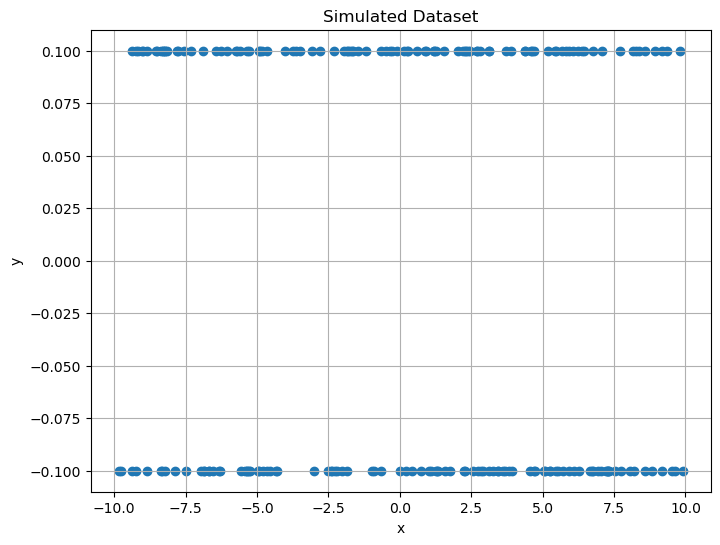

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import random

# Parameters
random.seed(10)
num_points = 100  # Number of points per cluster
x_range = (-10, 10)  # Range for the x component

# Generate points for the first cluster (y = 0.1)
x1 = np.random.uniform(x_range[0], x_range[1], num_points)
y1 = np.full_like(x1, 0.1)  # All y values are 0.1
labels1 = np.zeros(num_points)  # Label 0 for the first cluster

# Generate points for the second cluster (y = -0.1)
x2 = np.random.uniform(x_range[0], x_range[1], num_points)
y2 = np.full_like(x2, -0.1)  # All y values are -0.1
labels2 = np.ones(num_points)  # Label 1 for the second cluster

# Combine the clusters into a single dataset
x = np.concatenate([x1, x2])
y = np.concatenate([y1, y2])
data = np.vstack([x, y]).T  # Shape: (2 * num_points, 2)
labels = np.concatenate([labels1, labels2])  # Combined labels

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Simulated Dataset')
plt.grid(True)
plt.show()

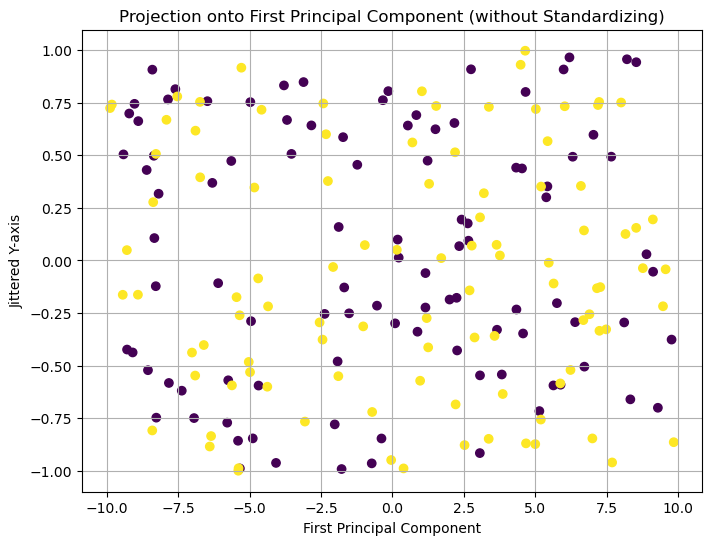

In [2]:
# Perform PCA without standardizing
pca = PCA(n_components=1)
pca.fit(data)

# Project data onto the first principal component
projected_data = pca.transform(data)

# Add jitter to the y-axis of the projected data
jitter = np.random.uniform(-1, 1, size=projected_data.shape[0])

# Plot the projected data, color-coded by cluster
plt.figure(figsize=(8, 6))
plt.scatter(projected_data, jitter, c=labels)
plt.xlabel('First Principal Component')
plt.ylabel('Jittered Y-axis')
plt.title('Projection onto First Principal Component (without Standardizing)')
plt.grid(True)
plt.show()

In [3]:
pca.components_[0]

array([ 0.99999878, -0.0015603 ])

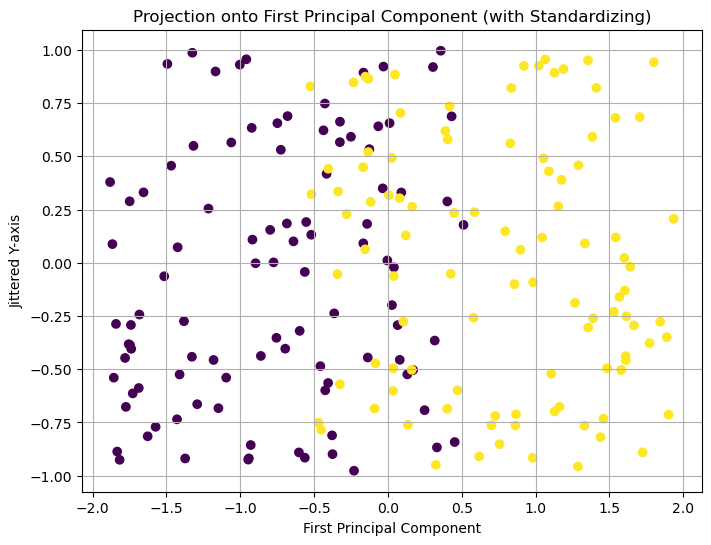

In [4]:
# Perform PCA with standardizing
scaler = StandardScaler()
data = scaler.fit_transform(data)
pca = PCA(n_components=1)
pca.fit(data)

# Project data onto the first principal component
projected_data = pca.transform(data)

# Add jitter to the y-axis of the projected data
jitter = np.random.uniform(-1, 1, size=projected_data.shape[0])

# Plot the projected data, color-coded by cluster
plt.figure(figsize=(8, 6))
plt.scatter(projected_data, jitter, c=labels)
plt.xlabel('First Principal Component')
plt.ylabel('Jittered Y-axis')
plt.title('Projection onto First Principal Component (with Standardizing)')
plt.grid(True)
plt.show()

In [5]:
pca.components_[0]

array([ 0.70710678, -0.70710678])

## Komentarz do wykonanej analizy

Na wykresie *x vs. y* wyraźnie widoczne są dwa klastry: jeden odpowiadający punktom o wartości $y=0.1$ oraz drugi dla punktów o wartości $y=−0.1$, przy czym wartości zmiennej $x$ rozciągają się od -10 do 10. Analiza PCA bez standaryzowania wykazała bez zaskoczeń, że pierwszy komponent główny jest skierowany niemal równolegle do wektora \[1,0\], czyli zgodnie z osią $x$. Na drugim wykresie przedstawiono projekcję danych na pierwszy komponent PCA. Zaburzenia na osi pionowej dodano wyłącznie w celu poprawy czytelności. Można zaobserwować, że projekcja na pierwszy komponent „zgubiła” strukturę klastrową danych.

Jednakże po standaryzacji zmiennych problem ten zniknął. Stanowi to argument przemawiający za koniecznością standaryzacji zmiennych przed przeprowadzeniem analizy PCA.

Wnioskiem z tej analizy jest to, że przedstawiony na początku przykład nie jest dobrą ilustracją tezy, jakoby PCA nie nadawało się jako narzędzie do klastrowania.